# 1 - Perkenalan

Nama : Husain Tsabit Abdur Rahim

Batch : ftds h8 016 - RMT

Problem Statement : Mengklasifikasikan resiko penggunaan kredit di German berdasarkan identitas dari orang yang melakukan kredit.

Objective : 

1. menggolongkan pengguna kredit di German berdasarkan usia
2. menggolongkan pengguna kredit di German berdasarkan jenis pekerjaan
3. menggolongkan pengguna kredit di German berdasarkan jenis rumah
4. mencari korelasi antar fitur pada dataset

# 2 - Import Pustaka

In [1]:
# libraries
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# outlier
from feature_engine.outliers import Winsorizer

#splitting data
from sklearn.model_selection import train_test_split

#handling imbalance
from imblearn.over_sampling import SMOTE

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#scaling
from sklearn.preprocessing import MinMaxScaler

# Encoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

#Model Machine Learning
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive Bayes

# Hyperparameter
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# Untuk evaluasi model
from sklearn.metrics import f1_score, accuracy_score

# metrics
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# 3 - Data Loading

## 3.1 Import Dataset

In [2]:
# import dataset
data = pd.read_csv('german_credit_data 2.csv')
data #menampilkan data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


penjelasan dari setiap kolom :
1. Age (numeric)
2. ex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
10. Risk (text: good, bad)

## 3.2 Drop Data

karena data sesungguhnya dari sumber kaggle hanya terdiri dari 10 kolom, maka kolom `Unnamed: 0` akan di drop

In [3]:
# menghapus kolom `Unnamed`
data = data.drop('Unnamed: 0', axis = 1)
data # menampilkan dataset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


selanjutnya akan menduplikat dataset supaya apabila data aslinya dibutuhkan maka bisa menggunakan data copy-an

## 3.3 Duplicate Dataset

In [4]:
# Duplicate dataset
data_copy = data.copy()
data_copy #menampilkan data copy

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


## 3.4 Data Information

In [5]:
# mengecek info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


data terdiri dari 1000 rows dan 9 columns, data terdiri dari numerical dan categorical data, bisa di lihat sepertinya terdapat missing values pada column `Saving account` dan column `Checking account`. Untuk pembuktian maka nanti akan di handling missing values tersebut.

# 3.5 Data Statistics

In [6]:
# statistics dari dataset
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


berikut merupakan beberapa hasil dari statistik angka numerik dataset : 
1. rata-rata pengguna kredit di German yaitu berusia 35 tahun, dengan usia tertua yaitu 75 tahun.
2. rata-rata jumlah kredit masyarakat German yaitu 3271 DM, dengan nilai tertingginya yaitu 18424
3. rata-rata masyarakat german mengambil kredit dengan jangka 20 bulan, dengan dursi terlama yaitu 72 tahun

# 4 - Exploratory Data Analyst (EDA)

## 4.1 Check Missing Values

                  Num   Pct
Age                 0   0.0
Sex                 0   0.0
Job                 0   0.0
Housing             0   0.0
Saving accounts   183  18.3
Checking account  394  39.4
Credit amount       0   0.0
Duration            0   0.0
Purpose             0   0.0
Risk                0   0.0


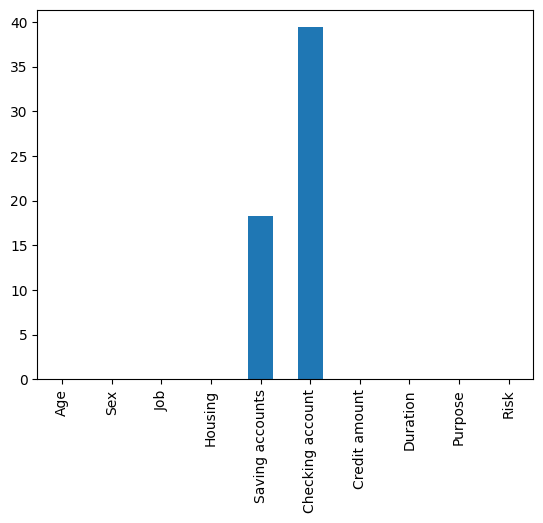

In [7]:
# mencari nilai missing di setiap kolom
missing = data.isnull().sum()

# mencari persentase dari setiap kolom
missing_pct = round(data.isnull().sum()/len(data) * 100, 1)

data_missing = pd.concat([missing, missing_pct], axis=1)
data_missing.columns = ["Num", "Pct"]
print(data_missing)

# Plot missing values
data_missing['Pct'].plot(kind= "bar")
plt.show()

mengacu kepada praduga awal pada tahap data loading, dapat dilihat bahwa pada kolom `Saving account` terdapat data hilang sejumlah 183 atau 18.3% dari data dan data missing pada kolom `Checking account` sejumlah 394 data atau 39.4% data.

## 4.2 Check Data Distribution

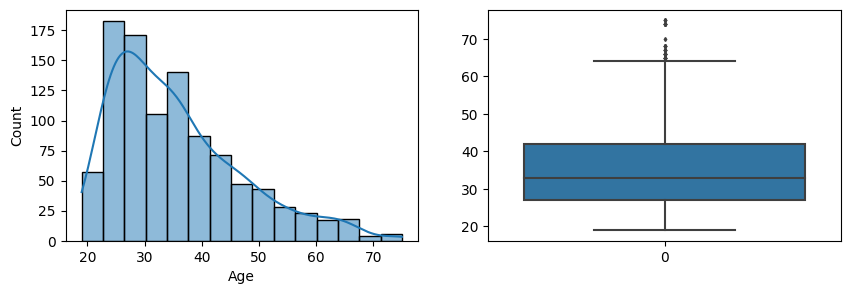

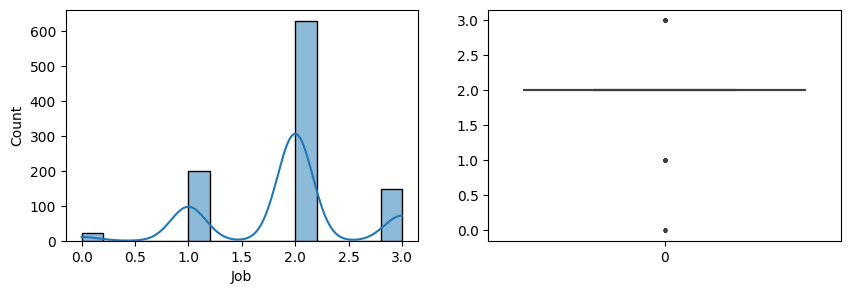

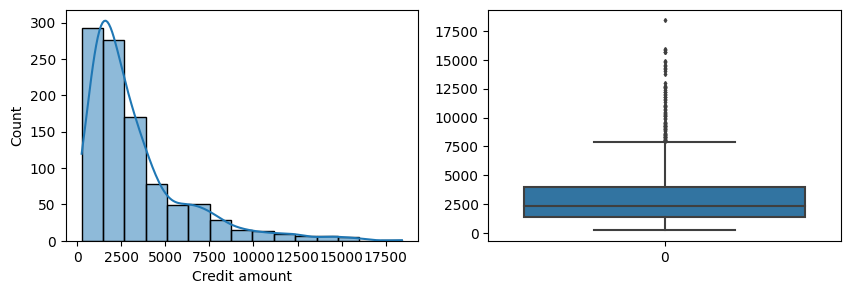

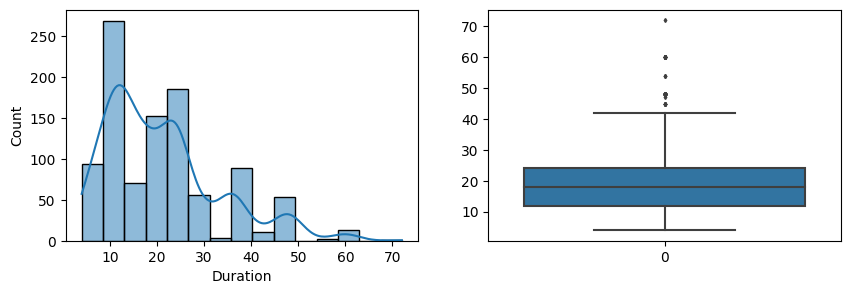

In [8]:
# Create distibution plot for analysis

num_col = [feature for feature in data.columns if data[feature].dtypes!='object']

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(10, 3))

    sns.histplot(data[i],bins=15, kde=True,ax=axs[0])
    sns.boxplot(data[i], ax = axs[1], fliersize=2)

dapat dilihat dari distribusi data numeric di atas, bahwa mayoritas distribusi data pada dataset bersifat skewed dan terdapat ouliers pada data tersebut

## 4.3 Data Correlation

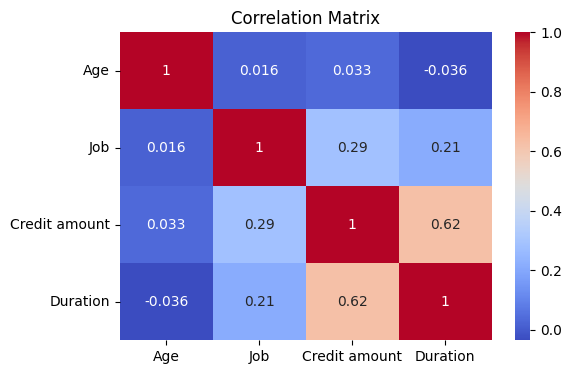

In [9]:
# create plot correlation

plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

dari kolom yang bertipe numerik ini memiliki status korelasi tergolong rendah, hanya kolom `Credit amount` dan `Duration` yang memiliki korelasi tinggi (> 0.5).

## 4.4 Gender Category

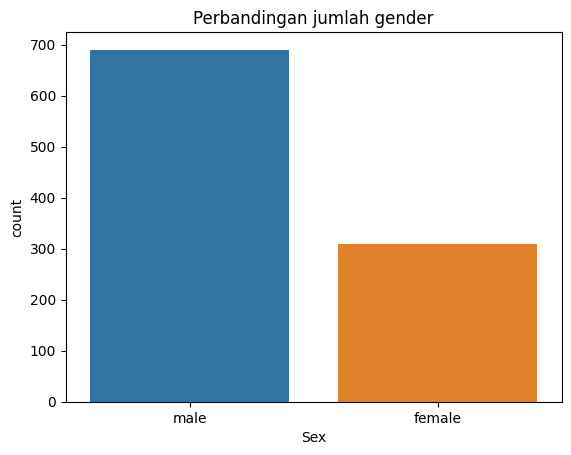

In [10]:
# membuat barplot berdasarkan jenis kelamin

sns.countplot(data, x='Sex')
plt.title('Perbandingan jumlah gender')
plt.show()

berdasarkan barplot jenis kelamin laki-laki menjadi pengajuan kredit terbanyak di German dibandingkan dengan perempuan.

## 4.5 scatterplot balance dan age

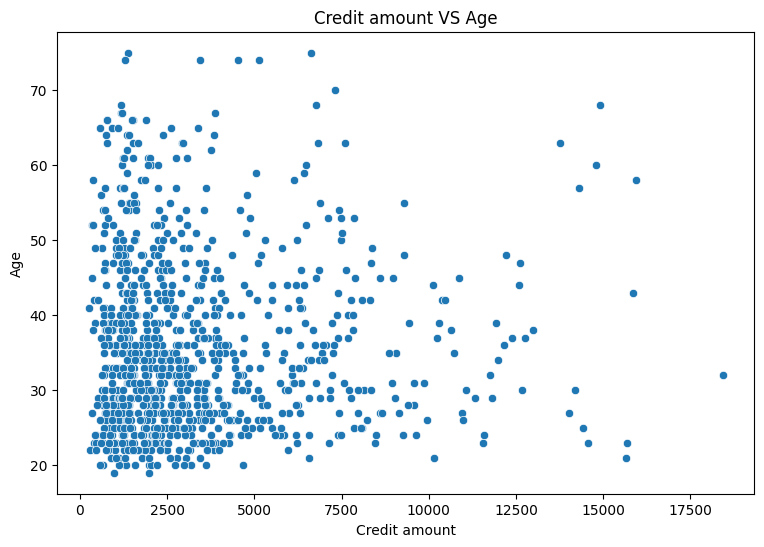

In [11]:
# scatterplot Credit amount dan age
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Credit amount',y='Age',data=data)
plt.title('Credit amount VS Age')
plt.show()

mayoritas pemilik kredit di german berusia dibawah 50 tahun dan memiliki credit amout dibawah 5000, yang berarti bahwa usia tidak mempengaruhi jumlah saldo credit amount. Terdapat pula yang usianya masih muda namun saldo credit amount nya tinggi.

## 4.6 Average Credit Amount by Job

In [12]:
# mencari jumlah rata-rata saldo berdasarkan jenis pekerjaan
job_credit = data.groupby(['Job']).mean()['Credit amount']
job_credit = pd.DataFrame(job_credit.sort_values(ascending = False))
job_credit

,Credit amount
Job,
3,5435.493243
2,3070.965079
0,2745.136364
1,2358.520000


<AxesSubplot: xlabel='Job', ylabel='Credit amount'>

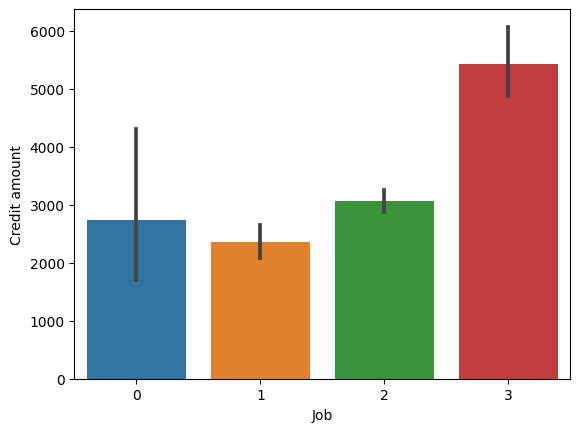

In [13]:
# barplot saldo kredit berdasarkan jenis pekerjaan
sns.barplot(data=data, x="Job", y="Credit amount")

keterangan nomor : (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

berdasarkan hasil analisis di atas tipe pekerjaan yang memiliki higly skilled menjadi pemilik saldo credit amount yang paling tinggi diantara yang lainnya dengan nilai rata-rata yaitu 5435, sedangkan untuk jenis pekerjaan yang saldo creditnya paling rendah yaitu pada pekerjaan dengan tipe unskilled dengan saldo rata-rata yaitu 2358.

## 4.7 Average Credit Amount by Type of House

In [14]:
# finding the average credit amount by type of house
type_house = data.groupby(['Housing']).mean()['Credit amount']
type_house = pd.DataFrame(type_house.sort_values(ascending = False))
type_house

,Credit amount
Housing,
free,4906.212963
rent,3122.553073
own,3060.939691


<AxesSubplot: xlabel='Housing', ylabel='Credit amount'>

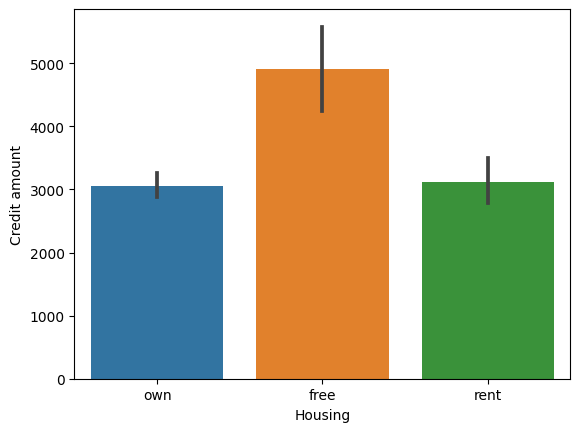

In [15]:
# membuat visualisasi dari rata-rata saldo berdasarkan tipe rumah
sns.barplot(data=data, x="Housing", y="Credit amount")

tipe rumah untuk saldo credit amount yang paling tinggi yaitu free atau gratis dengan jumlah rata-rata saldo yaitu 4906, sedangkan jumlah rata-rata saldo yang paling rendah yaitu orang yang memiliki rumah sendiri dengan nilai rata-rata 3060, nilai tersebut beda tipis dengan orang yang rumahnya sewa yaitu 3122

## 4.8 Check Imbalance Data

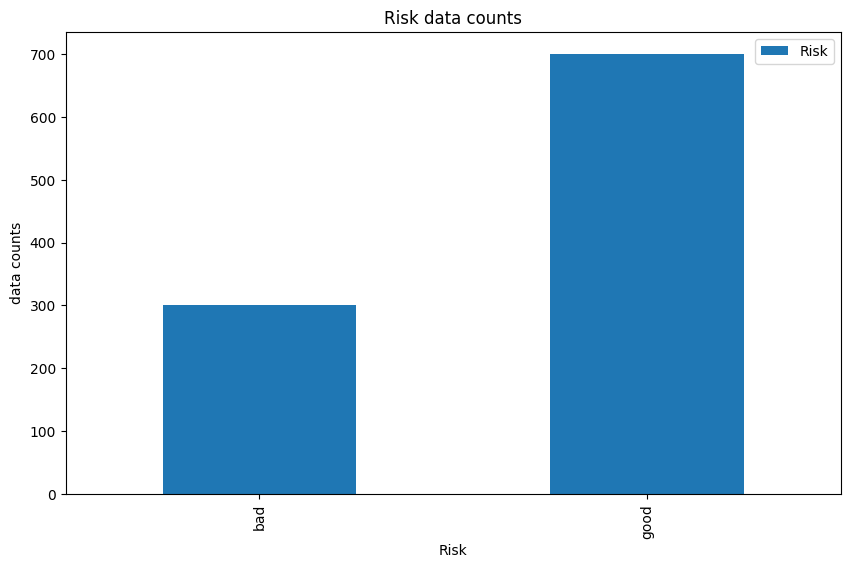

In [16]:
# check imbalance target
data.groupby(["Risk"])[["Risk"]].count().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Risk') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Risk data counts') # add title to the plot

plt.show()

Terdapat adanya imbalance pada data target, yang dimana kategori `good` mendominasi senilai 70% dari keseluruhan data, dan sisanya kategori `bad` hanya memiliki jumlah keseluruhan 30% data dari 100%. Namun imbalance ini akan dibiarkan tidak di handle, karena ini merupakan data berdasarkan nilai keleuruhan fitur, bila di handle mungkin akan merusak struktur data.

# 5 - Data Preprocessing

## 5.1 Handling Missing Values

berdasarkan hasil pengecekan missing values pada EDA dapat dilihat bahwa missing values berada pada kolom `Saving accounts` dan `Checking account` dengan jumlah yang lumayan, kemudian missing values akan di handle dengan menggunakan metode imputation. Karena data bertipe categorical maka metode imputation akan menggunakan nilai dari mode.

In [17]:
# mencari mode dari kolom `Saving accounts`
data['Saving accounts'].mode()



0    little
Name: Saving accounts, dtype: object

In [18]:
#mencari mode dari kolom `Saving accounts`

data['Checking account'].mode()

0    little
Name: Checking account, dtype: object

In [19]:
# mengganti nilai NaN dengan Mode
data["Saving accounts"].fillna("little", inplace=True)
data["Checking account"].fillna("little", inplace=True)

In [20]:
# cek kembali missing value
data['Saving accounts'].isnull().sum()
data['Checking account'].isnull().sum()

0

## 5.2 Memisahkan Data Inference

In [21]:
# getting 20 data for model inference
data_inf = data.sample(20, random_state=15)

# melihat data inference 
data_inf 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
825,30,male,2,own,little,little,1602,21,car,good
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
488,35,male,1,rent,moderate,little,1418,10,car,good
608,33,male,2,own,little,little,2051,18,radio/TV,good
42,44,male,1,own,little,moderate,6204,18,repairs,good
836,21,female,2,own,little,little,886,12,radio/TV,good
247,35,male,2,rent,moderate,little,1204,6,car,good
334,23,male,2,rent,little,little,4110,24,furniture/equipment,bad
205,38,male,3,free,little,little,10623,30,car,good
988,29,male,3,free,little,little,6579,24,car,good


In [22]:
# drop data inference from dataset
data_train_test = data.drop(data_inf.index)


In [23]:
# reset indexing
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## 5.3 Splitting Features and Target

In [24]:
# Splitting dataset X adalah feature dan y adalah target
X = data.drop('Risk', axis = 1)
y = data['Risk']

karena target bersifat kategorikal, maka saya akan melakukan proses encoding untuk memudahkan dalam proses pengecekan imbalance nanti.

In [25]:
# menggunakan Feature Encoding dengan labelencoder

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

## 5.4 Splitting Train-set and Test-set

In [26]:
#Splitting dataset into 80% for train and 20% for data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# looking the shape from X_train and X_test
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (800, 9)
Test Size :  (200, 9)


statement : total data train is 800 rows and 9 columns, and Test size is 200 rows and 9 columns

## 5.5 Split Numerical and Categorical Feature

In [27]:
# get numerical columns and categorical columns

X_train_num = X_train.select_dtypes(include=np.number).columns.tolist()
X_train_cat = X_train.select_dtypes(include=['object']).columns.tolist()

X_test_num = X_test.select_dtypes(include=np.number).columns.tolist()
X_test_cat = X_test.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns    : ', X_train_num)
print('Categorical Columns  : ', X_train_cat)

Numerical Columns    :  ['Age', 'Job', 'Credit amount', 'Duration']
Categorical Columns  :  ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


In [28]:
# mencari tau unique value di kolom kategori

print("Unique values in each categorical column:")
for col in data.select_dtypes(include=[object]):
    print(col,":", data[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : ['little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk : ['good' 'bad']


## 5.6 Handling Outlier

Melihat distribusi data melalui Histogram dan Boxplot sebelum handling outlier

In [29]:
# Function to create histogram and boxplot.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

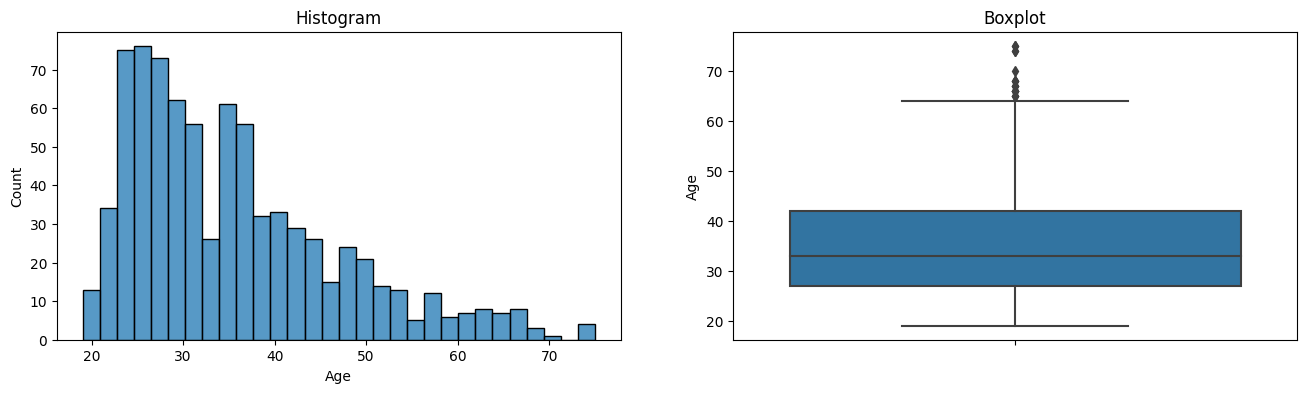

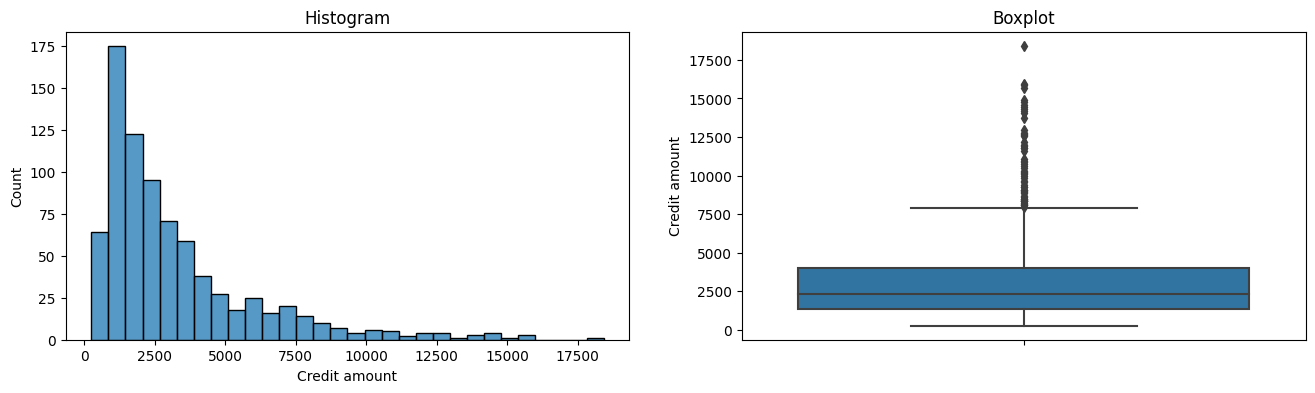

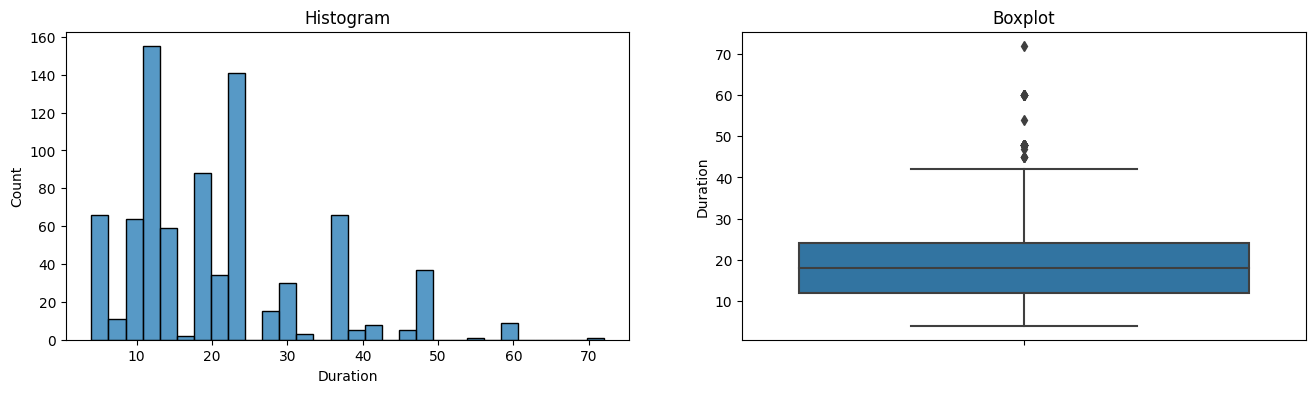


Age Skewness Value :  1.0373793839373915

Credit amount Skewness Value :  1.9826340676623955

Duration Skewness Value :  1.1158743699746185


In [30]:
# Melihat tingkat skewed dari data 
diagnostic_plots(X_train, 'Age')
diagnostic_plots(X_train, 'Credit amount')
diagnostic_plots(X_train, 'Duration')

print('\nAge Skewness Value : ', X_train['Age'].skew())
print('\nCredit amount Skewness Value : ', X_train['Credit amount'].skew())
print('\nDuration Skewness Value : ', X_train['Duration'].skew())



dapat dilihat seluruh distribusi data termasuk dalam kategori skewed

In [31]:
# membuat fungsi untuk mencari batas atas dan batas bawah dari data yang berdistribusi skewed
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [32]:
# Limits for `Age`
age_upper_limit, age_lower_limit = find_skewed_boundaries(X_train, 'Age', 1.5)
age_upper_limit, age_lower_limit

# Limits for `Credit amount`
ca_upper_limit, ca_lower_limit = find_skewed_boundaries(X_train, 'Credit amount', 1.5)
ca_upper_limit, ca_lower_limit

# Limits for `Duration`
duration_upper_limit, duration_lower_limit = find_skewed_boundaries(X_train, 'Duration', 1.5)
duration_upper_limit, duration_lower_limit

print('age_upper_limit : ', age_upper_limit)
print('age_lower_limit : ', age_lower_limit, '\n')
print('ca_upper_limit : ', ca_upper_limit)
print('ca_lower_limit : ', ca_lower_limit, '\n')
print('duration_upper_limit : ', duration_upper_limit)
print('duration_lower_limit : ', duration_lower_limit)

age_upper_limit :  64.5
age_lower_limit :  4.5 

ca_upper_limit :  7918.5
ca_lower_limit :  -2579.5 

duration_upper_limit :  42.0
duration_lower_limit :  -6.0


setelah melihat batas atas dan batas bawah, saya memutuskan untuk melakukan penanganan outlier menggunakan metode capping, dengan alasan tidak ingin membuang dataset.

In [33]:
# create capper with median imputation
windsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=[
    "Age","Credit amount","Duration"])

# fit data
windsoriser.fit(X_train)

#transform data
X_train_handle = windsoriser.transform(X_train)

In [34]:
# melihat statistik data setelah proses capping
X_train_handle.describe()

,Age,Job,Credit amount,Duration
count,800.000000,800.000000,800.000000,800.00000
mean,35.333125,1.911250,3043.656250,20.06750
std,11.117755,0.651079,2201.831249,10.54998
min,19.000000,0.000000,250.000000,4.00000
25%,27.000000,2.000000,1357.250000,12.00000
50%,33.000000,2.000000,2286.000000,18.00000
75%,42.000000,2.000000,3981.750000,24.00000
max,64.500000,3.000000,7918.500000,42.00000


Setelah menghandle outlier dengan proses capping, beberapa nilai values dari kolom telah berubah, tapi tidak ada data yang hilang.

## 5.7 Pipeline Scaling and Pipeline Encoding

In [35]:
# Numeric Features Scaling
numeric_pipeline = Pipeline(steps=[('Scaler', MinMaxScaler())])

In [36]:
# Categorical Features Encoding
categorical_pipeline = Pipeline(steps=[('encoder', OrdinalEncoder())])

In [37]:
# combine Numerical pipeline and Categorical pipeline
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('category', categorical_pipeline, X_train.select_dtypes(include=['object']).columns)
])

In [38]:
# mentransform pipeline scaling & encoding
X_train_final = full_processor.fit_transform(X_train)
X_test_final = full_processor.fit_transform(X_test)

X_train_final

array([[0.17857143, 0.        , 0.20578849, ..., 0.        , 1.        ,
        2.        ],
       [0.51785714, 0.66666667, 0.04258831, ..., 0.        , 0.        ,
        5.        ],
       [0.125     , 0.33333333, 0.01870804, ..., 0.        , 1.        ,
        5.        ],
       ...,
       [0.39285714, 1.        , 0.1990756 , ..., 0.        , 0.        ,
        1.        ],
       [0.28571429, 0.66666667, 0.05727963, ..., 0.        , 0.        ,
        5.        ],
       [0.32142857, 0.66666667, 0.11164301, ..., 0.        , 0.        ,
        5.        ]])

In [39]:
# membuat dataset dari pipeline
X_train_final = pd.DataFrame(X_train_final, columns=[X_train_num + X_train_cat])
X_test_final = pd.DataFrame(X_test_final, columns=[X_test_num + X_test_cat])

X_train_final

,Age,Job,Credit amount,Duration,Sex,Housing,Saving accounts,Checking account,Purpose
0,0.178571,0.000000,0.205788,0.470588,0.0,1.0,0.0,1.0,2.0
1,0.517857,0.666667,0.042588,0.294118,1.0,1.0,0.0,0.0,5.0
2,0.125000,0.333333,0.018708,0.029412,1.0,1.0,0.0,1.0,5.0
3,0.392857,0.666667,0.205183,0.647059,1.0,1.0,0.0,1.0,5.0
4,0.446429,0.333333,0.327611,0.205882,1.0,1.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...
795,0.232143,0.666667,0.092880,0.294118,1.0,1.0,0.0,0.0,5.0
796,0.535714,0.333333,0.158138,0.117647,1.0,1.0,0.0,1.0,1.0
797,0.392857,1.000000,0.199076,0.294118,0.0,2.0,0.0,0.0,1.0
798,0.285714,0.666667,0.057280,0.117647,0.0,1.0,0.0,0.0,5.0


## 5.8 Feature Selection

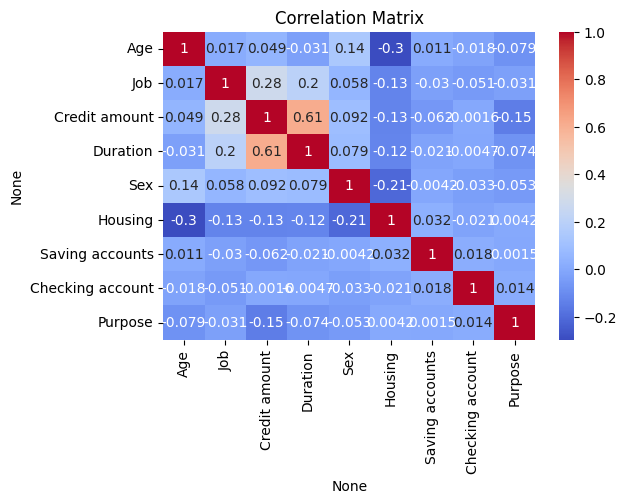

In [40]:
# create plot correlation

plt.figure(figsize=(6, 4))
sns.heatmap(X_train_final.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Setelah proses scaling dan encoding dan dilakukan dengan menghandle imbalance data, kemudian mengecek korelasi antar fitur pada dataset, walaupun korelasi antar kolom tergolong rendah, tapi seluruh data akan tetap digunakan.

# 6 - Model Machine Learning

## 6.1 Model Logistic Regression

### 6.1.1 Model Definition

In [41]:
# membentuk model dari logistic regression
model_logreg = LogisticRegression() 

### 6.1.2 Model Training

In [42]:
#melatih model logistic regression

model_logreg.fit(X_train_final, y_train) 

LogisticRegression()

### 6.1.3 Model Prediction

In [43]:
# LogReg Model Prediction train set and test set

y_pred_train_logreg = model_logreg.predict(X_train_final)
y_pred_test_logreg = model_logreg.predict(X_test_final)


## 6.2 Model SVM

### 6.2.1 Model Definition

In [44]:
#bentuk model SVC
model_svm = SVC (random_state=0)

### 6.2.2 Model Train

In [45]:
# menlatih model SVM
model_svm.fit(X_train_final, y_train) 

SVC(random_state=0)

### 6.2.3 Model Prediction

In [46]:
# SVM Model Prediction train set and test set
y_pred_train_svm = model_svm.predict(X_train_final)
y_pred_test_svm = model_svm.predict(X_test_final)

## 6.3 Model Random Forest

### 6.3.1 Model Definition

In [47]:
# mendefinisikan model random forest
model_rf = RandomForestClassifier()

### 6.3.2 Model Train

In [48]:
# mentraining model
model_rf.fit(X_train_final, y_train)

RandomForestClassifier()

### 6.3.3 Model Predict

In [49]:
# SVM Model Prediction train set and test set
y_pred_train_rf = model_rf.predict(X_train_final)
y_pred_test_rf = model_rf.predict(X_test_final)

## 6.4 Model Decision Tree

### 6.4.1 Model Definition

In [50]:
# mendefinisikan model decision tree
model_dt = DecisionTreeClassifier()

### 6.4.2 Model Training

In [51]:
# mentraining model
model_dt.fit(X_train_final, y_train)


DecisionTreeClassifier()

### 6.4.3 Model Prediction

In [52]:
# SVM Model Prediction train set and test set
y_pred_train_dt = model_dt.predict(X_train_final)
y_pred_test_dt = model_dt.predict(X_test_final)

## 6.5 Model KNN

### 6.5.1 Model definition

In [53]:
# mendefinisikan model KNN
model_knn = KNeighborsClassifier()

### 6.5.2 Model training

In [54]:
# mentraining model
model_knn.fit(X_train_final, y_train)

KNeighborsClassifier()

### 6.5.3 Model prediction

In [55]:
# SVM Model Prediction train set and test set
y_pred_train_knn = model_knn.predict(X_train_final)
y_pred_test_knn = model_knn.predict(X_test_final)

## 6.6 Model Naive Bayes

### 6.6.1 Model definition

In [56]:
# definisikan model baive bayes
model_nb = GaussianNB()

### 6.6.2 Model training

In [57]:
# mentraining model
model_nb.fit(X_train_final, y_train)

GaussianNB()

### 6.6.3 Model prediction

In [58]:
# SVM Model Prediction train set and test set
y_pred_train_nb = model_nb.predict(X_train_final)
y_pred_test_nb = model_nb.predict(X_test_final)

## 6.7 Model Evaluation

### 6.7.1 Model Score

In [59]:
# melakukan validasi model sebanyak 5 kali
k_fold = KFold(n_splits=5)

# cross validation tiap model
score_logreg = cross_val_score(model_logreg, X_train_final, y_train, cv=k_fold)
score_svm = cross_val_score(model_svm, X_train_final, y_train, cv=k_fold)
score_dt = cross_val_score(model_dt, X_train_final, y_train, cv=k_fold)
score_rf = cross_val_score(model_rf, X_train_final, y_train, cv=k_fold)
score_knn = cross_val_score(model_knn, X_train_final, y_train, cv=k_fold)
score_nb = cross_val_score(model_nb, X_train_final, y_train, cv=k_fold)


In [60]:
# menampilkan hasil validasi tiap model
print("Score 5 Cross Validation Logistic Regression {}".format(score_logreg))
print("Score 5 Cross Validation SVM {}".format(score_svm))
print("Score 5 Cross Validation Decision Tree {}".format(score_dt))
print("Score 5 Cross Validation Random Forest {}".format(score_rf))
print("Score 5 Cross Validation KNN {}".format(score_knn))
print("Score 5 Cross Validation Naive Bayes {}".format(score_nb))

Score 5 Cross Validation Logistic Regression [0.6875  0.7125  0.63125 0.75    0.75   ]
Score 5 Cross Validation SVM [0.70625 0.70625 0.625   0.7375  0.7375 ]
Score 5 Cross Validation Decision Tree [0.625   0.65625 0.55    0.59375 0.61875]
Score 5 Cross Validation Random Forest [0.71875 0.6875  0.60625 0.70625 0.725  ]
Score 5 Cross Validation KNN [0.65625 0.68125 0.60625 0.6625  0.6875 ]
Score 5 Cross Validation Naive Bayes [0.69375 0.7125  0.60625 0.7     0.76875]


In [61]:
# menampilkan hasil validasi tiap model

print('----Logistic Regression----')
print(f'Log Mean : {score_logreg.mean()}')
print(f'Log Std : {score_logreg.std()}')
print('')
print('----SVC----')
print(f'SVC Mean : {score_svm.mean()}')
print(f'SVC Std : {score_svm.std()}')
print('')
print('----Decision Tree----')
print(f'DT Mean : {score_dt.mean()}')
print(f'DT Std : {score_dt.std()}')
print('')
print('----Random Forest----')
print(f'RF Mean : {score_rf.mean()}')
print(f'RF Std : {score_rf.std()}')
print('')
print('----KNN----')
print(f'KNN Mean : {score_knn.mean()}')
print(f'KNN Std : {score_knn.std()}')
print('')
print('----Naive Bayes----')
print(f'NB Mean : {score_nb.mean()}')
print(f'NB Std : {score_nb.std()}')
print('')

----Logistic Regression----
Log Mean : 0.70625
Log Std : 0.04437059837324713

----SVC----
SVC Mean : 0.7025
SVC Std : 0.041193142633210215

----Decision Tree----
DT Mean : 0.6087499999999999
DT Std : 0.03548767391644596

----Random Forest----
RF Mean : 0.68875
RF Std : 0.04319288135792751

----KNN----
KNN Mean : 0.65875
KNN Std : 0.028668362352949308

----Naive Bayes----
NB Mean : 0.69625
NB Std : 0.05223145603944048



Kita bisa melihat bahwa model default dari Random Forest mendapatkan nilai mean dari 5 cross validation tertinggi yaitu terdapat pada model Logistic Regression 0.706 dan nilai std yang relatif rendah yaitu 0.004, namun masih kalah rendah dengan model KNN yaitu 0.028.

In [62]:
# Mencari accuracy score
print('----Training Set----')
print('Log acc score : ', accuracy_score(y_train, model_logreg.predict(X_train_final)))
print('SVC acc score : ', accuracy_score(y_train, model_svm.predict(X_train_final)))
print('DT acc score : ', accuracy_score(y_train, model_dt.predict(X_train_final)))
print('RF acc score : ', accuracy_score(y_train, model_rf.predict(X_train_final)))
print('KNN acc score : ', accuracy_score(y_train, model_knn.predict(X_train_final)))
print('NB acc score : ', accuracy_score(y_train, model_nb.predict(X_train_final)))
print('')
print('----Testing Set----')
print('Log acc score : ', accuracy_score(y_test, model_logreg.predict(X_test_final)))
print('SVC acc score : ', accuracy_score(y_test, model_svm.predict(X_test_final)))
print('DT acc score : ', accuracy_score(y_test, model_dt.predict(X_test_final)))
print('RF acc score : ', accuracy_score(y_test, model_rf.predict(X_test_final)))
print('KNN acc score : ', accuracy_score(y_test, model_knn.predict(X_test_final)))
print('NB acc score : ', accuracy_score(y_test, model_nb.predict(X_test_final)))


----Training Set----
Log acc score :  0.7125
SVC acc score :  0.7025
DT acc score :  1.0
RF acc score :  1.0
KNN acc score :  0.765
NB acc score :  0.69875

----Testing Set----
Log acc score :  0.685
SVC acc score :  0.69
DT acc score :  0.655
RF acc score :  0.705
KNN acc score :  0.7
NB acc score :  0.685


Kita bisa melihat bahwa berdasarkan accuracy score hanya model Logistic Regression, SVC dan Naive Bayes yang tergolong goodfit. Sedangkan Decision Tree dan Random Forest berhasil mendapatkan accurary 1 pada Train Set, namun mengalami overfit karena score pada Testnya berbeda jauh. Untuk model KNN juga tergolong overfit. 

- Model Logistic Regression : untuk data train 71% dan test 68%
- Model SVM : untuk data train 70% dan data test 69%
- Model Decision Tree : untuk data train 100% dan data test 65%
- Model Random Forest : untuk data train 100% dan data test 70%
- Model KNN : untuk data train 76% dan data test 70%
- Model Naive Bayes : untuk data train 69% dan data test 68%

In [63]:
# Mencari f1 score
print('----Training Set----')
print('Log f1 score : ', f1_score(y_train, model_logreg.predict(X_train_final)))
print('SVC f1 score : ', f1_score(y_train, model_svm.predict(X_train_final)))
print('DT f1 score : ', f1_score(y_train, model_dt.predict(X_train_final)))
print('RF f1 score : ', f1_score(y_train, model_rf.predict(X_train_final)))
print('KNN f1 score : ', f1_score(y_train, model_knn.predict(X_train_final)))
print('NB f1 score : ', f1_score(y_train, model_nb.predict(X_train_final)))
print('')
print('----Testing Set----')
print('Log f1 score : ', f1_score(y_test, model_logreg.predict(X_test_final)))
print('SVC f1 score : ', f1_score(y_test, model_svm.predict(X_test_final)))
print('DT f1 score : ', f1_score(y_test, model_dt.predict(X_test_final)))
print('RF f1 score : ', f1_score(y_test, model_rf.predict(X_test_final)))
print('KNN f1 score : ', f1_score(y_test, model_knn.predict(X_test_final)))
print('NB f1 score : ', f1_score(y_test, model_nb.predict(X_test_final)))

----Training Set----
Log f1 score :  0.8246951219512195
SVC f1 score :  0.8252569750367107
DT f1 score :  1.0
RF f1 score :  1.0
KNN f1 score :  0.8486312399355878
NB f1 score :  0.8035859820700897

----Testing Set----
Log f1 score :  0.7961165048543689
SVC f1 score :  0.8165680473372781
DT f1 score :  0.7509025270758124
RF f1 score :  0.8052805280528054
KNN f1 score :  0.8051948051948051
NB f1 score :  0.7835051546391751


- F1 Score Logistic Regression : data train 82% dan test 79%
- F1 Score SVM : data train 82% dan data test 81%
- F1 Score Decision Tree : data train 100% dan data test 75%
- F1 Score Random Forest : data train 100% dan data test 80%
- F1 Score KNN : data train 84% dan data test 80%
- F1 Score Naive Bayes : data train 80% dan data test 78%

Karena target dari model kita imbalance, jadi kita tidak bisa terpaku hanya pada accuracy score saja karena accuracy bisa menjadi bias bila data kita imbalance, maka dari itu kita juga melihat f1 score. Untuk f1 score pada Logistic Regression, SVC, KNN, dan Naive Bayes tergolong kategori goodfit. Sedangkan Decision Tree dan Random Forest merupakan model yang overfit.

Dari hasil score di atas, saya memutuskan untuk menggunakan model Logistic Regression untuk dilakukan Hyperparameter Tuning karena memiliki nilai rata-rata yang bagus pada cross validation score, dan juga merupakan model yang goodfit karena tidak memiliki gap yang jauh antara Train dan Test dalam accuracy score maupun f1 score.

# 7 - Hyperparameter Tuning for Best Model

## 7.1 Model Definition

Selanjutnya mencari kombinasi parameter yang paling bagus menggunakan Gridsearch kepada model terbaik.

In [64]:
# definisikan parameter yang akan diuji
param_logistic = {
                    'penalty': ['l1', 'l2', 'none'],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                    'max_iter': [50, 100]
}

In [65]:
# gridseacrh dengan cross validation 5 kali
logistic_grid = GridSearchCV(model_logreg, param_logistic, cv=5, scoring='accuracy', return_train_score=True)

## 7.2 Model Training

In [66]:
# Training model
logistic_grid.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [50, 100], 'penalty': ['l1', 'l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, scoring='accuracy')

In [67]:
# kombinasi paramter terbaik
print('best params:', logistic_grid.best_params_)

# score dari kombinasi parameter terbaik
print('best score:', logistic_grid.best_score_)

best params: {'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
best score: 0.70625


In [68]:
# definisikan estemator terbaik dengan model
logistic_best = logistic_grid.best_estimator_
print(logistic_best)

LogisticRegression(max_iter=50, penalty='l1', solver='liblinear')


dari gridsearch diperoleh kombinasi paramter untuk digunakan model yaitu solver liblinear, menggunakan penalty l1 dan max iterasi 50 kali. Hasil ini akan digunakan untuk prediksi data train dan test.

## 7.3 Model Prediction

Setelah dilakukan training model dan menggunakan hyperparameter tunning, model akan melakukan prediksi pada data train dan test

In [69]:
# prediksi data train
y_pred_train_log_best = logistic_best.predict(X_train_final)
# prediksi data test
y_pred_test_log_best = logistic_best.predict(X_test_final)

### 7.3 Model Evaluation

In [70]:
# hasiil train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_log_best))

# hasiil test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_log_best))

Hasil prediksi train-set
[[ 33 205]
 [ 26 536]]

 Hasil prediksi test-set
[[ 15  47]
 [ 13 125]]


Dari hasil confusion matrix dapat dilihat bahwa data train yang diklasifikan secara benar ada 33+536/800 = 0.71 dari 1 dan yang masih diklasifikan salah ada 205+26/800 = 0.29 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data train adalah 71%.

sedangkan untuk data test yang diklasifikan secara benar ada 15 + 125/200 = 0.7 dari 1 dan yang masih diklasifikan salah ada 47+13/200 = 0.3 dari 1. Oleh karena itu nilai klasifikasi yang benar menunjukkan seberapa akurat model dalam klasifikasi, untuk data test adalah 70%.

In [71]:
# hasiil train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_log_best))

# hasil test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_log_best))


Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.56      0.14      0.22       238
           1       0.72      0.95      0.82       562

    accuracy                           0.71       800
   macro avg       0.64      0.55      0.52       800
weighted avg       0.67      0.71      0.64       800


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.54      0.24      0.33        62
           1       0.73      0.91      0.81       138

    accuracy                           0.70       200
   macro avg       0.63      0.57      0.57       200
weighted avg       0.67      0.70      0.66       200



In [72]:
print('----Training Set----')
print('Logreg acc score : ', accuracy_score(y_train, logistic_grid.best_estimator_.predict(X_train_final)))
print('----Test Set----')
print('Logreg acc score : ', accuracy_score(y_test, logistic_grid.best_estimator_.predict(X_test_final)))


----Training Set----
Logreg acc score :  0.71125
----Test Set----
Logreg acc score :  0.7


## 8 - Model Analysis

Dalam kasus ini kita awalnya memilih 6 baseline model untuk melakukan klasifikasi target. Model yang dipilih adalah Logistic Regresion, Support Vector Clasifier, Decision Tree, Random Forest, KNN, dan Naive Bayes. Pertama kita akan melakukan cross validation untuk menemukan model terbaik dari 6 model di atas, berdasarkan hasil cross validation scorenya. Kita menemukan Logistic Regression memiliki score yang paling baik, model ini juga ternyata goodfit pada accuracy dan f1 scorenya, maka dari itu kita akan melakukan hyperparameter tuning pada model Logistic Regression menggunakan gridsearch.

dari hasil gridsearch diperoleh kombinasi paramter terbaik untuk digunakan kepada model Logistic Regression yaitu solver liblinear, menggunakan penalty l1 dan max iterasi 50 kali. Hasil ini akan digunakan untuk prediksi data train dan test. Kemudian hasil ini digunakan untuk memprediksi data train dan test. Kita bisa melihat score yang dihasilkan pada Train dan Test set lumayan bagus dan goodfit. Namun Logistic Regression setelah dilakukan tuning menghasilkan nilai accuracy dan f1 score yang lebih rendah pada Train Set dan Test set jika dibandingkan dengan Logistic Regession baseline.

Dalam kasus ini kita berusaha mencari klasifikasi tipe kredit berdasarkan resiko untuk dapat menolak saat ingin mengajukan kredit, dengan kata lain kita akan fokus ke false negatif label 1 dimana seharusnya dia tergolong kreditur yang buruk namun kita klasifikasikan kepada kategori bagus sehingga bisa merugikan perusahaan jika ada customer yang tidak bisa bayar di kemudian hari. Dari hasil evaluasi Model Logistic Regression setelah tuning, kita berhasil memperoleh hasil yang bagus pada recall label 1 yaitu 0.95 pada Train Set dan 0.91 pada Test Set. Namun untuk label 0 nilai nya sangat kecil, hal ini mungkin di sebabkan oleh adanya imbalance data.

# 9 - Model Inference

Sebelum melakukan evaluasi pada Inference Set, kita akan melakukan tahapan preprocessing yang sama dengan yang dilakukan pada Test-Set.

In [73]:
# menampilkan data inference
data_inf

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,30,male,2,own,little,little,1602,21,car,good
1,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
2,35,male,1,rent,moderate,little,1418,10,car,good
3,33,male,2,own,little,little,2051,18,radio/TV,good
4,44,male,1,own,little,moderate,6204,18,repairs,good
5,21,female,2,own,little,little,886,12,radio/TV,good
6,35,male,2,rent,moderate,little,1204,6,car,good
7,23,male,2,rent,little,little,4110,24,furniture/equipment,bad
8,38,male,3,free,little,little,10623,30,car,good
9,29,male,3,free,little,little,6579,24,car,good


In [74]:
# splitting between X and y

X_inf = data_inf.drop(['Risk'], axis=1)
y_inf = data_inf['Risk']
X_inf

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,30,male,2,own,little,little,1602,21,car
1,60,female,3,free,moderate,moderate,14782,60,vacation/others
2,35,male,1,rent,moderate,little,1418,10,car
3,33,male,2,own,little,little,2051,18,radio/TV
4,44,male,1,own,little,moderate,6204,18,repairs
5,21,female,2,own,little,little,886,12,radio/TV
6,35,male,2,rent,moderate,little,1204,6,car
7,23,male,2,rent,little,little,4110,24,furniture/equipment
8,38,male,3,free,little,little,10623,30,car
9,29,male,3,free,little,little,6579,24,car


In [75]:
# melakukan LabelEncoder untuk data target
labelencoder = LabelEncoder()
y_inf = labelencoder.fit_transform(y_inf)

# Memasukkan hasil encoding target ke dataframe
y_inf = pd.DataFrame(y_inf, columns=['Risk Inference'])


In [76]:
# mentransform pipeline scaling & encoding pada data inference
X_inf_final = full_processor.fit_transform(X_inf)

In [77]:
# Inference Model Prediction using Best parameter logistic regression

y_inf_pred = logistic_best.predict(X_inf_final)


In [78]:
# Memasukkan hasil prediksi data inference dalam data set
y_pred_inf = pd.DataFrame(y_inf_pred, columns=['Risk Prediction'])

# Gabungkan data Target Inference dengan kolom prekdiksi
df_inf_predic = pd.concat([y_inf, y_pred_inf], axis=1)

In [79]:
# tampilkan kolom income dan income prediksi

df_inf_predic

,Risk Inference,Risk Prediction
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,1
8,1,1
9,1,1


dari 20 data inference, terdapat 2 data yang masih di prediksi dengan salah, berarti model baru bisa memprediksi 90% data dengan benar. 

In [80]:
print('Hasil prediksi data inference')
print(classification_report(y_inf, y_pred_inf))

Hasil prediksi data inference
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.89      1.00      0.94        16

    accuracy                           0.90        20
   macro avg       0.94      0.75      0.80        20
weighted avg       0.91      0.90      0.89        20



Hasil evaluasi pada Inference-Set menunjukan hasil memuaskan pada score accuracy. Model Logistic Regression hasil tuning menghasilkan nilai recall pada label 1 lebih baik dibandingkan dengan Train dan Test yaitu 1.00. Sedangkan pada label 0, hasil dari prediksi dari data inference lebih baik daripada data Train dan Test.

# 10 - Overall Analysis

Dataset kali ini berisi data pengguna kredit di German. Target dari dataset kita ini adalah apakah pengguna tergolong kedalam kreditur yang baik atau buruk. Data ini berisi umur, jenis kelamin, tipe pekerjaan, tipe rumah, kategori tabungan, kategori rekening giro, jumlah kredit, durasi pembayaran kredit, kategori penggolongan si kreditur.

berikut merupakan beberapa hasil dari statistik data numerik pada dataset : 
1. rata-rata pengguna kredit di German yaitu berusia 35 tahun, dengan usia tertua yaitu 75 tahun.
2. rata-rata jumlah kredit masyarakat German yaitu 3271 DM, dengan nilai tertingginya yaitu 18424
3. rata-rata masyarakat german mengambil kredit dengan jangka 20 bulan, dengan dursi terlama yaitu 72 tahun

kemudian terdapat beberapa Analisis yang di dapatkan pada Exploratory Data Analyst (EDA).
1. Dalam pengecekan Missing Values pada dataset terdapat data NaN pada kolom yang bertipe kategorikal, maka saya mengambil langkah pada data preprocessing untuk menghandle nya menggunakan metode imputasi mode kepada data yang hilang.
2. Untuk distribusi dari data yang bertipe numeric di atas, bahwa mayoritas data berdistribusi skewed dan terdapat beberapa ouliers pada data tersebut.
3. Dari kolom yang bertipe numerik ini dilakukan pengecekan korelasi menggunakan heatmap, dapat dilihat di atas bahwa status korelasi tergolong rendah, hanya kolom `Credit amount` dan `Duration` yang memiliki korelasi tinggi (> 0.5).
4. jenis kelamin laki-laki menjadi pengajuan kredit terbanyak di German dibandingkan dengan perempuan.
5. mayoritas pemilik kredit di german berusia dibawah 50 tahun dan memiliki credit amout dibawah 5000, yang berarti bahwa usia tidak mempengaruhi jumlah saldo credit amount. Terdapat pula yang usianya masih muda namun saldo credit amount nya tinggi.
6. Berdasarkan hasil analisis di atas tipe pekerjaan yang memiliki higly skilled menjadi pemilik saldo credit amount yang paling tinggi diantara yang lainnya dengan nilai rata-rata yaitu 5435, sedangkan untuk jenis pekerjaan yang saldo creditnya paling rendah yaitu pada pekerjaan dengan tipe unskilled dengan saldo rata-rata yaitu 2358.
7. Tipe rumah untuk saldo credit amount yang paling tinggi yaitu free atau gratis dengan jumlah rata-rata saldo yaitu 4906, sedangkan jumlah rata-rata saldo yang paling rendah yaitu orang yang memiliki rumah sendiri dengan nilai rata-rata 3060, nilai tersebut beda tipis dengan orang yang rumahnya sewa yaitu 3122
8. Terdapat adanya imbalance pada data target, yang dimana kategori `good` mendominasi senilai 70% dari keseluruhan data, dan sisanya kategori `bad` hanya memiliki jumlah keseluruhan 30% data dari 100%. Namun imbalance ini akan dibiarkan tidak di handle, karena ini merupakan data berdasarkan nilai keleuruhan fitur, bila di handle mungkin akan merusak struktur data.

setelah itu saya melakukan prediksi dengan 6 model klasifikasi yang berbeda dan hasil akurasi yang hampir sama, yaitu :

- Model Logistic Regression : untuk data train 71% dan test 68%
- Model SVM : untuk data train 70% dan data test 69%
- Model Decision Tree : untuk data train 100% dan data test 65%
- Model Random Forest : untuk data train 100% dan data test 70%
- Model KNN : untuk data train 76% dan data test 70%
- Model Naive Bayes : untuk data train 69% dan data test 68%

Karena target dari model kita imbalance, jadi kita tidak bisa terpaku hanya pada accuracy score saja karena accuracy bisa menjadi bias bila data kita imbalance, maka dari itu kita juga melihat f1 score. Berikut merupakan hasil dari F1-Score:

- F1 Score Logistic Regression : data train 82% dan test 79%
- F1 Score SVM : data train 82% dan data test 81%
- F1 Score Decision Tree : data train 100% dan data test 75%
- F1 Score Random Forest : data train 100% dan data test 80%
- F1 Score KNN : data train 84% dan data test 80%
- F1 Score Naive Bayes : data train 80% dan data test 78%

Untuk f1 score pada Logistic Regression, SVC, KNN, dan Naive Bayes tergolong kategori goodfit. Sedangkan Decision Tree dan Random Forest merupakan model yang overfit.Tetapi, saya memutuskan untuk menggunakan model Logistic Regression untuk dilakukan Hyperparameter Tuning karena memiliki nilai rata-rata yang bagus pada cross validation score, dan juga merupakan model yang goodfit karena tidak memiliki gap yang jauh antara Train dan Test dalam accuracy score maupun f1 score.

Pada saat inferencing pun model Logistic Regression berhasil memprediksi 18 data dengan benar dari total keseluruhan 20 data. Berarti model sudah memprediksi 90% data dengan benar. Maka Model Logistic Regression telah dapat memprediksi data baru yang terpisah dari dataset.